# Полный pipeline на примере полиномиальной регрессии (polynomial regression)


## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn scipy -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import scipy
from scipy import stats

scipy.__version__

'1.6.2'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (FuelConsumption)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [8]:
df = pd.read_csv("./../../data/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Анализ данных и преобразование типов

### Анализ типов

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [10]:
df.MODELYEAR.value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [11]:
# удалить бессмысленую колонку
del df['MODELYEAR']

In [12]:
for col_name in df.select_dtypes(exclude=np.number):
    nunique = df[col_name].nunique()
    print(f"column: {col_name}\tunique: {nunique}")

column: MAKE	unique: 39
column: MODEL	unique: 663
column: VEHICLECLASS	unique: 16
column: TRANSMISSION	unique: 22
column: FUELTYPE	unique: 4


In [13]:
# преобразовать в правильные типы
df.MODEL = df.MODEL.astype("string")

for col_name in df.select_dtypes(include='object'):
    df[col_name] = df[col_name].astype("category")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MAKE                      1067 non-null   category
 1   MODEL                     1067 non-null   string  
 2   VEHICLECLASS              1067 non-null   category
 3   ENGINESIZE                1067 non-null   float64 
 4   CYLINDERS                 1067 non-null   int64   
 5   TRANSMISSION              1067 non-null   category
 6   FUELTYPE                  1067 non-null   category
 7   FUELCONSUMPTION_CITY      1067 non-null   float64 
 8   FUELCONSUMPTION_HWY       1067 non-null   float64 
 9   FUELCONSUMPTION_COMB      1067 non-null   float64 
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 11  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(4), float64(4), int64(3), string(1)
memory usage: 73.9 KB


## Анализ числовых признаков

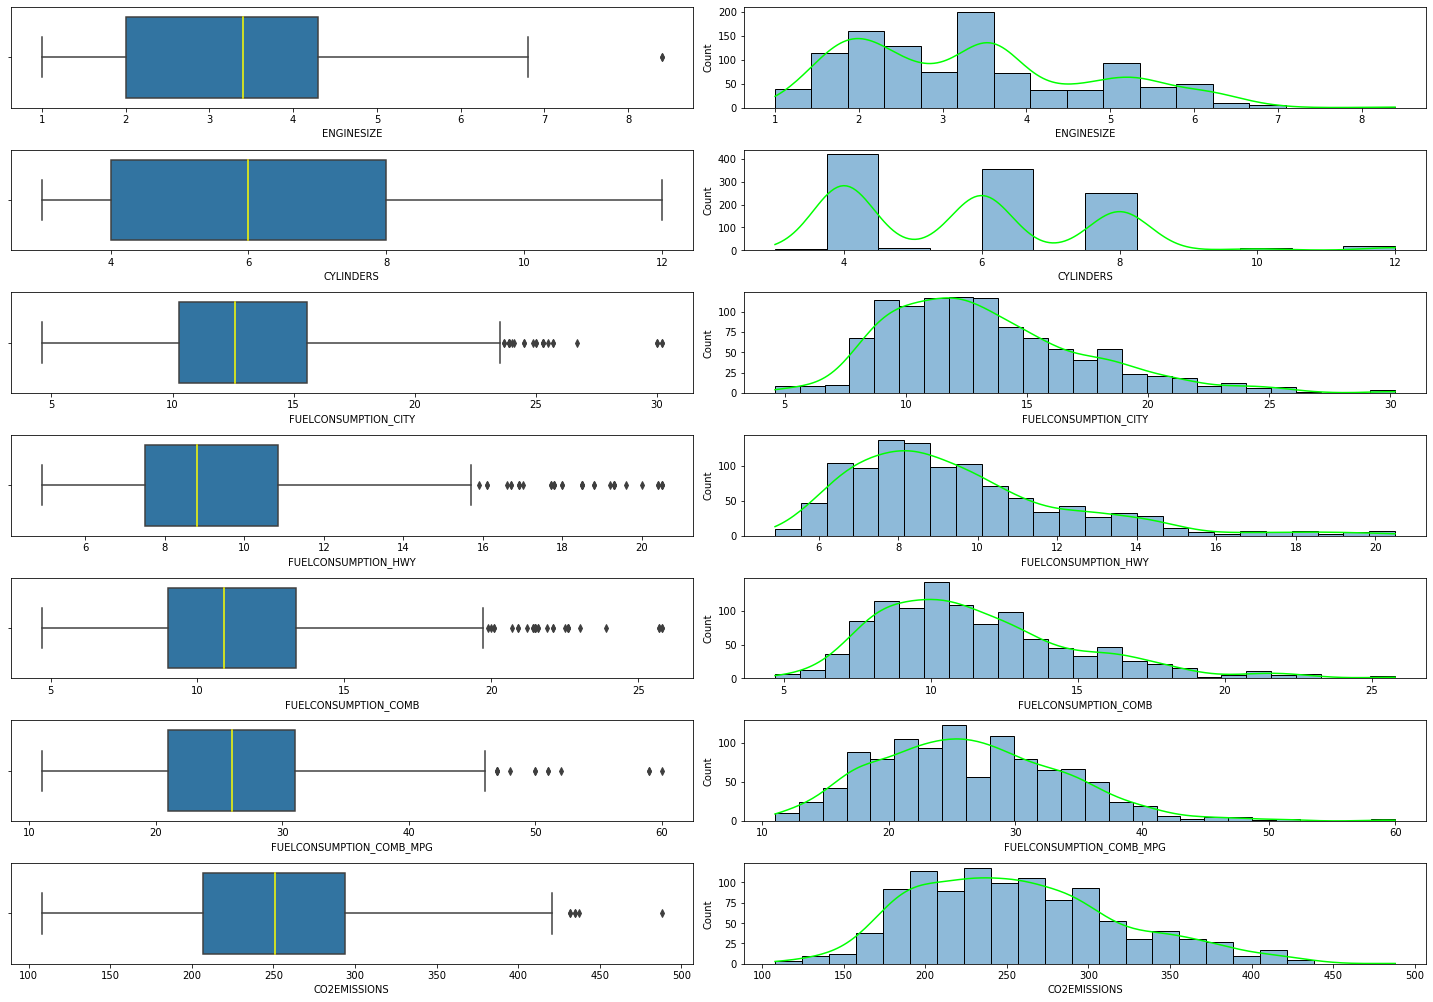

In [15]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
fig, axs = plt.subplots(len(num_cols), 2, figsize=(20, 2 * len(num_cols)))

for index, column_name in enumerate(num_cols):
    sns.boxplot(x=df[column_name], ax=axs[index][0])
    axs[index][0].get_lines()[4].set_color('yellow')
    
    sns.histplot(x=df[column_name], kde=True, ax=axs[index][1])
    axs[index][1].get_lines()[0].set_color('lime')
    
fig.tight_layout(pad=1.0)

Выводы:
- Колонки `ENGINESIZE` и `CYLINDERS` - это порядковая шкала, то есть тоже "категориальная".
- Имеются выбросы. Нужно будет что-то предпринять по этому поводу.
- Остальные числовые признаки распределены почти нормально, но точно требуют нормализации. Со стандартизацией можно поэксперементировать.

## Анализ категориальных признаков

In [16]:
df.ENGINESIZE = df.ENGINESIZE.astype(pd.CategoricalDtype(ordered=True))
df.CYLINDERS = df.CYLINDERS.astype(pd.CategoricalDtype(ordered=True))

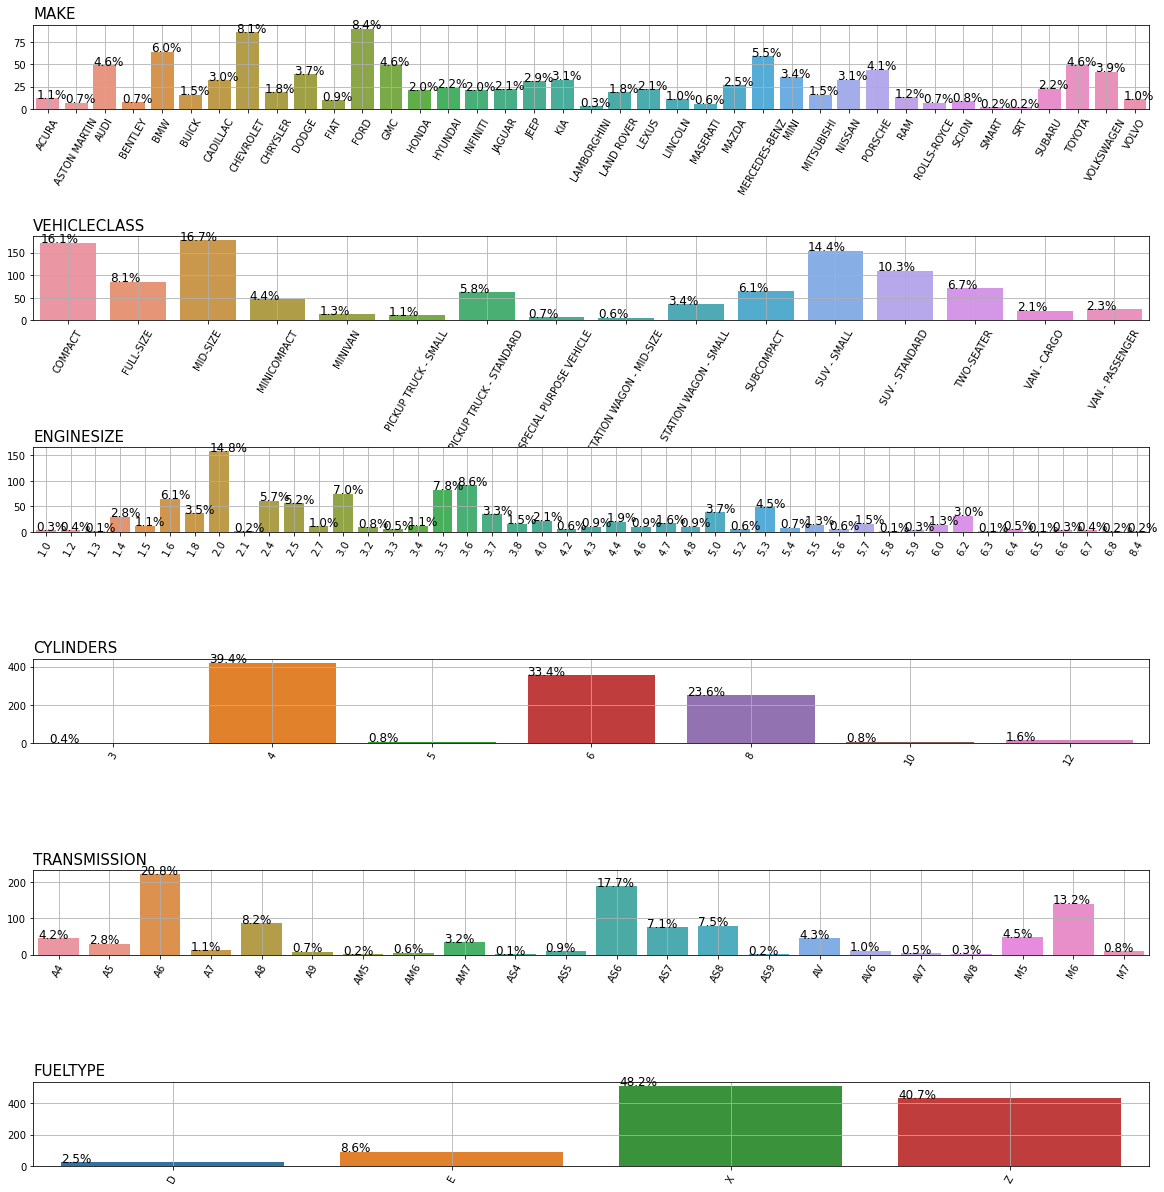

In [17]:
# распределение значений в НЕ числовых признаках
cat_cols = df.select_dtypes(include='category').columns.to_list()
fig, axs = plt.subplots(len(cat_cols), 1, figsize=(20, 3.5*len(cat_cols)))
for index, col_name in enumerate(cat_cols):
    ax = axs[index]
    
    g = sns.countplot(x=df[col_name], ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=60)
    
    # отключить подпись оси x и y
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    
    # включить сетку на графике
    ax.grid()
    
    # сколько всего записей для всех категорий в колонке
    total = len(df[col_name])
    
    # для каждого столбца на графике сверху добавить процент
    for p in ax.patches:
        # вычислить процент, который соответствует текущему столбцу
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)

        # начало (слева) столбца на графике по оси x
        x_pos = p.get_x()

        # верх столбца на графике по оси x
        y_pos = p.get_y() + p.get_height()

        # добавить процент в качестве аннотации к столбцу
        ax.annotate(percentage, 
                    xy=(x_pos, y_pos), 
                    fontsize=12)
        
        # наименование графика справа цветом графика
        ax.set_title(col_name, 
                 loc='left', 
                 fontsize=15)
    
    # расстояние между графиками по горизонтали и вертикали
    fig.subplots_adjust(hspace=1.5)

<AxesSubplot:xlabel='TRANSMISSION', ylabel='CO2EMISSIONS'>

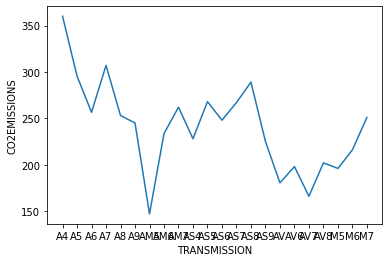

In [18]:
sns.lineplot(data=df.groupby(by=['TRANSMISSION']).CO2EMISSIONS.aggregate("median"))

In [19]:
df.groupby(by=['FUELTYPE']).CO2EMISSIONS.aggregate("median")

FUELTYPE
D    224
E    285
X    230
Z    259
Name: CO2EMISSIONS, dtype: int64

In [20]:
df.CYLINDERS.value_counts()

4     420
6     356
8     252
12     17
5       9
10      9
3       4
Name: CYLINDERS, dtype: int64

In [21]:
df.groupby(by=['CYLINDERS']).CO2EMISSIONS.aggregate("median")

CYLINDERS
3     147.0
4     199.0
5     223.0
6     260.0
8     325.5
10    389.0
12    368.0
Name: CO2EMISSIONS, dtype: float64

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

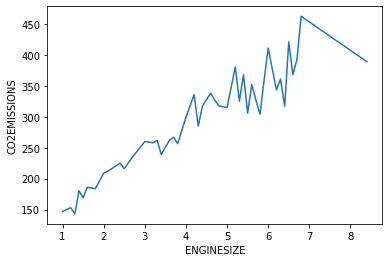

In [22]:
sns.lineplot(data=df.groupby(by=['ENGINESIZE']).CO2EMISSIONS.aggregate("median"))

Выводы:
- Много категорий, которые представлены малым количеством записей.
- Если бы это была реальная задача, то нужно было бы что-то с этим делать. Хорошее решение: объединить некоторые категории в одну (требуется разбираться в предметной области).
- Допустим, что категориальные признаки имеют следующие шкалы (см. [лекцию](../../03_data_analysis/lectures/08_statistical_data_types.ipynb))
:
    - `FUELTYPE` - номинальная
    - `TRANSMISSION` - норминальная
    - `MAKE` - норминальная
    - `CYLINDERS` - порядковая
    - `ENGINESIZE` - порядковая

## Анализ отсутствующих значений

In [23]:
df.isna().sum()

MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Анализ корреляций

In [24]:
# функция, которая вычисляет коэффициент корреляции и 
# добавляет его в качестве "аннотации"
def corr(x, y, cor_name='pearson', **kwargs):
    if cor_name == 'pearson':
        prefix = 'p='
        r, _ = stats.pearsonr(x, y)
        cmap = plt.get_cmap('PuOr')
        xy=(0.1, 0.9)
        
    elif cor_name == 'spearman':
        prefix = 's='
        r, _ = stats.spearmanr(x, y)
        cmap = plt.get_cmap('seismic')
        xy=(0.5, 0.1)
        
    ax = plt.gca()
    ax.annotate(text="{}{:.2f}".format(prefix, r),
                xy=xy,          
                xycoords=ax.transAxes, 
                size=20,       
                color=cmap(r))  

In [25]:
def all_in_one_plot():
    g = sns.PairGrid(df)

    g.map_upper(sns.scatterplot, color='m')
    g.map_upper(corr, cor_name='spearman')

    g.map_diag(sns.histplot, color='blue', kde=True)
    g.map_diag(sns.rugplot, color='green', height=0.08)

    g.map_lower(sns.kdeplot, color='c')
    g.map_lower(corr, cor_name='pearson')

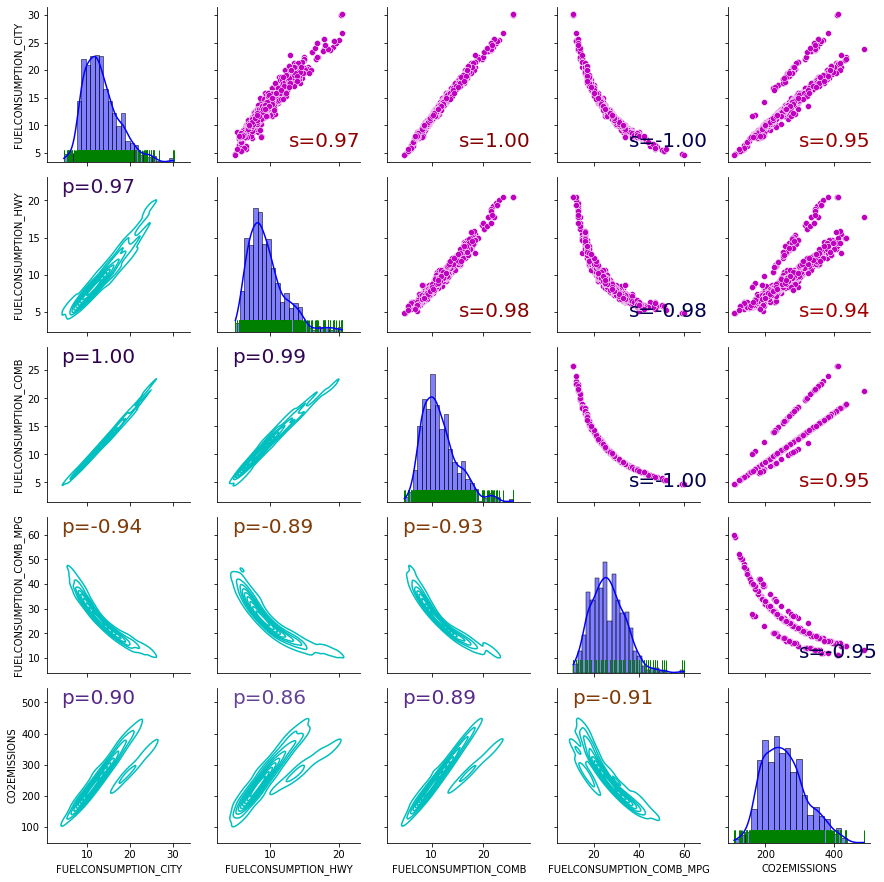

In [26]:
all_in_one_plot()

Выводы:
- Во многих признаках сильная корреляция. 
- Подозрительно выглядит корреляция равна 1. 
- Такая ситуация требует дополнительного исследования последствий.

## Удаление выбросов

In [27]:
def remove_outliers_iqr(data, col_name):
    print(f"column name: {col_name}\n")
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    data_new = data[~((data[col_name] < lower_fence) |
                      (data[col_name] > upper_fence))]
    
    diff_len = len(data) - len(data_new)
    print(f"removed: {diff_len}")
    
    _, axs = plt.subplots(2, 1, figsize=(6, 6))
    sns.boxplot(data=data_new[col_name], ax=axs[0])
    sns.histplot(data=data_new[col_name], ax=axs[1])
    
    df = data_new.reset_index(drop=True)

column name: FUELCONSUMPTION_CITY

removed: 26
------------------------------ 

column name: FUELCONSUMPTION_HWY

removed: 35
------------------------------ 

column name: FUELCONSUMPTION_COMB

removed: 32
------------------------------ 

column name: FUELCONSUMPTION_COMB_MPG

removed: 13
------------------------------ 

column name: CO2EMISSIONS

removed: 6
------------------------------ 



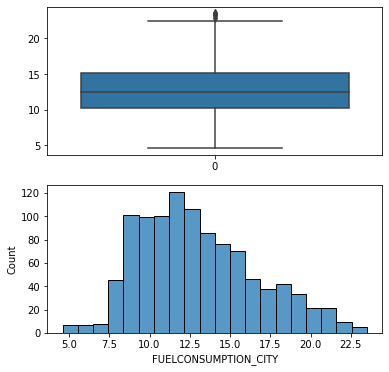

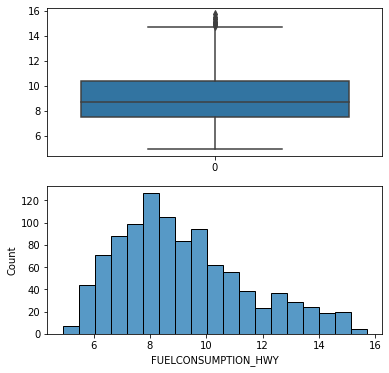

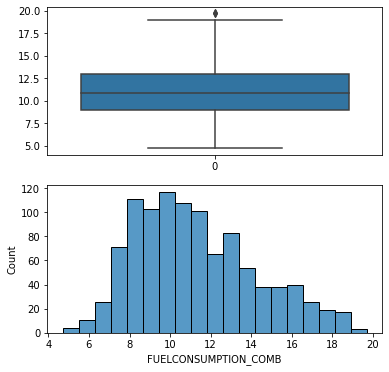

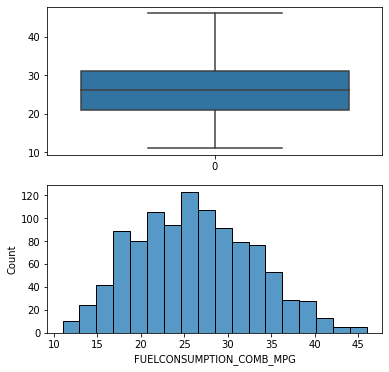

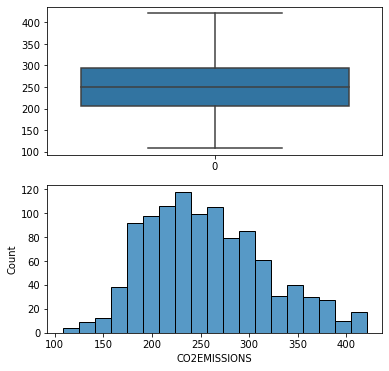

In [28]:
for col_name in df.select_dtypes(include=np.number):
    remove_outliers_iqr(df, col_name)
    print("-"*30, '\n')

## Нормализация

array([[<AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>]],
      dtype=object)

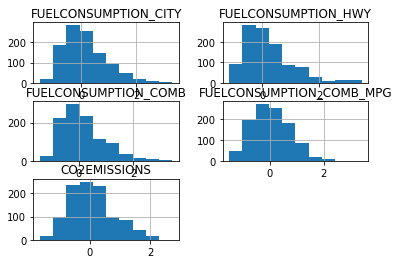

In [29]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df_num = df.select_dtypes(include=np.number)
df[df_num.columns] = robust_scaler.fit_transform(df_num)

df[df_num.columns].hist()

## Стандартизация

array([[<AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>]],
      dtype=object)

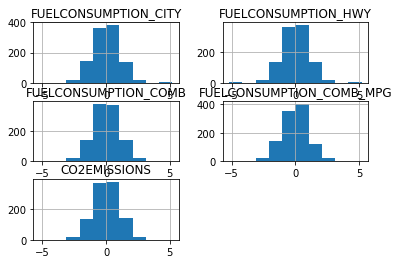

In [30]:
from sklearn.preprocessing import QuantileTransformer

quant_trans = QuantileTransformer(output_distribution='normal')
df[df_num.columns] = quant_trans.fit_transform(df_num)

df[df_num.columns].hist()

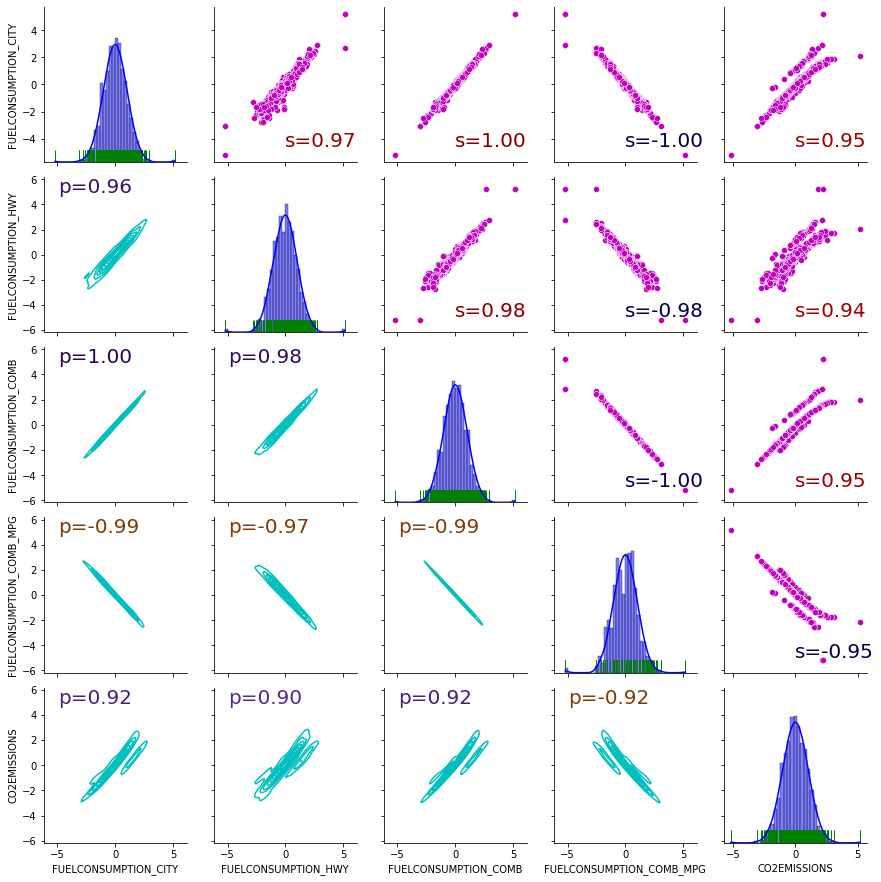

In [31]:
all_in_one_plot()

## Преобразование категориальных признаков в числа

- `FUELTYPE` - номинальная
- `TRANSMISSION` - норминальная
- `MAKE` - норминальная
- `CYLINDERS` - порядковая
- `ENGINESIZE` - порядковая

In [32]:
df.CYLINDERS = df.CYLINDERS.replace(3, 4).replace(5, 4).replace(10, 8).replace(12, 8)

In [33]:
df.CYLINDERS.value_counts()

4    433
6    356
8    278
Name: CYLINDERS, dtype: int64

In [34]:
df.ENGINESIZE = df.ENGINESIZE.astype(float).round(0)
df.ENGINESIZE.value_counts()

2.0    391
4.0    284
5.0    138
3.0    112
6.0     93
1.0     38
7.0      9
8.0      2
Name: ENGINESIZE, dtype: int64

In [35]:
df.ENGINESIZE = df.ENGINESIZE.replace(1, 2).replace(7, 6).replace(8, 6)
df.ENGINESIZE.value_counts()

2.0    429
4.0    284
5.0    138
3.0    112
6.0    104
Name: ENGINESIZE, dtype: int64

In [36]:
df.FUELTYPE.replace('D', 'X')

0       Z
1       Z
2       Z
3       Z
4       Z
       ..
1062    X
1063    X
1064    X
1065    X
1066    X
Name: FUELTYPE, Length: 1067, dtype: category
Categories (3, object): ['E', 'X', 'Z']

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc_ord = OrdinalEncoder()
df[['CYLINDERS_enc', 'ENGINESIZE_enc']] = enc_ord.fit_transform(df[['CYLINDERS', 'ENGINESIZE']])
df[['CYLINDERS', 'CYLINDERS_enc', 'ENGINESIZE', 'ENGINESIZE_enc']]

,CYLINDERS,CYLINDERS_enc,ENGINESIZE,ENGINESIZE_enc
0,4,0.0,2.0,0.0
1,4,0.0,2.0,0.0
2,4,0.0,2.0,0.0
3,6,1.0,4.0,2.0
4,6,1.0,4.0,2.0
...,...,...,...,...
1062,6,1.0,3.0,1.0
1063,6,1.0,3.0,1.0
1064,6,1.0,3.0,1.0
1065,6,1.0,3.0,1.0


In [38]:
from sklearn.preprocessing import OneHotEncoder

enc_oh = OneHotEncoder()
enc_oh_result = enc_oh.fit_transform(df[['FUELTYPE', 
#                                          'TRANSMISSION', 
#                                          'MAKE'
                                        ]])
column_names = enc_oh.get_feature_names(['FUELTYPE_enc', 
#                                          'TRANSMISSION_enc', 
#                                          'MAKE_enc'
                                        ])
df_enc_oh_result = pd.DataFrame(enc_oh_result.toarray(), columns=column_names)
df_enc_oh_result

,FUELTYPE_enc_D,FUELTYPE_enc_E,FUELTYPE_enc_X,FUELTYPE_enc_Z
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
1062,0.0,0.0,1.0,0.0
1063,0.0,0.0,1.0,0.0
1064,0.0,0.0,1.0,0.0
1065,0.0,0.0,1.0,0.0


## Удаление категориальных колонок

In [39]:
df_cat = df.select_dtypes(include='category')
df_cat

,MAKE,VEHICLECLASS,CYLINDERS,TRANSMISSION,FUELTYPE
0,ACURA,COMPACT,4,AS5,Z
1,ACURA,COMPACT,4,M6,Z
2,ACURA,COMPACT,4,AV7,Z
3,ACURA,SUV - SMALL,6,AS6,Z
4,ACURA,SUV - SMALL,6,AS6,Z
...,...,...,...,...,...
1062,VOLVO,SUV - SMALL,6,AS6,X
1063,VOLVO,SUV - SMALL,6,AS6,X
1064,VOLVO,SUV - SMALL,6,AS6,X
1065,VOLVO,SUV - SMALL,6,AS6,X


In [40]:
df.drop(df_cat.columns.to_list(), inplace=True, axis=1)

In [41]:
df.select_dtypes(include='category')

""
0
1
2
3
4
...
1062
1063
1064
1065


In [42]:
del df['MODEL']

## Удаление мультиколлинеарности

In [43]:
pd.set_option('display.max_rows', 100)

corr_matrix = df_num.corr()
corr_matrix[(abs(corr_matrix)) > 0.5]

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
FUELCONSUMPTION_CITY,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.898039,0.861748,0.892129,-0.906394,1.000000


In [44]:
# улучшает качество модели
df.drop(['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY'], inplace=True, axis=1)

## Разделение данные на `X` и `y`

In [45]:
from sklearn.model_selection import train_test_split

y = df['CO2EMISSIONS'].copy()
X = df.loc[:, df.columns != 'CO2EMISSIONS'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CYLINDERS_enc,ENGINESIZE_enc
897,3.0,0.641002,1.0,1.0
761,4.0,-0.125788,1.0,2.0
386,4.0,-1.571286,1.0,2.0
868,3.0,0.018820,1.0,1.0
1056,2.0,0.410169,0.0,0.0
...,...,...,...,...
502,2.0,1.428482,0.0,0.0
348,5.0,-2.511791,2.0,3.0
674,4.0,-0.269184,1.0,2.0
877,4.0,0.146048,1.0,2.0


## Полиномиальная линейная регрессия

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.        ,  3.        ,  0.64100179, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  4.        , -0.1257878 , ...,  2.        ,
         4.        ,  8.        ],
       [ 1.        ,  4.        , -1.5712865 , ...,  2.        ,
         4.        ,  8.        ],
       ...,
       [ 1.        ,  4.        , -0.2691844 , ...,  2.        ,
         4.        ,  8.        ],
       [ 1.        ,  4.        ,  0.14604751, ...,  2.        ,
         4.        ,  8.        ],
       [ 1.        ,  2.        ,  0.41016941, ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
from sklearn import linear_model
poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

print('Coefficients: ', poly_regr.coef_)
print('Intercept: ', poly_regr.intercept_)

Coefficients:  [ 2.90854113e+08  9.95761891e+06 -5.79548780e+08 -4.14583090e+08
 -3.14210971e+06 -1.47444375e+09  1.36394371e+09 -2.37018433e+08
 -1.42196196e+08 -4.41571502e+08 -2.54261524e+08  8.77898951e+08
  1.57592398e+08 -2.65860607e+08 -1.36695815e+08  1.82662506e+09
 -5.37084660e+08  9.00448641e+07 -3.92647366e+09  2.20785751e+08
  1.27130762e+08 -4.67520100e+07  2.88843515e+08  8.56951224e+07
  3.23539469e+09  1.39565930e-03 -3.35269800e-01 -2.20785751e+08
 -1.89760904e+00 -1.27130761e+08  5.83836669e+08 -2.06838927e+08
 -3.74915499e+08 -1.18358663e+08 -1.14510964e+09]
Intercept:  -9025994847.106806


In [55]:
from sklearn.metrics import r2_score

X_test_poly = poly.transform(X_test)
y_predicted = poly_regr.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 0.17
Residual sum of squares (MSE): 0.08
R2-score: 0.92


---
---

## Pipeline